## Лабораторная работа по курсу "Искусственный интеллект"

## Многослойный персептрон
|Студент| Плешков А.О. |
|:-----:|:-:|
|Группа|М8О-306Б-19|
|Вариант| 3 (1) |
|Фреймворк| PyTorch |

### Настройка среды

In [1]:
%pip install numpy
%pip install torch
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'1.11.0+cpu'

Введем функции для анализа датасетов:

In [3]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Колисчество элементов в классе")
    plt.xlabel("Номер класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете: {}".format(len(labels)))
    print("Количество атрибутов в элементе: {}".format(len(features[0])))
    print("Минимальное значение атрибута  : {}".format(np.min(features)))
    print("Максимальное значение атрибута : {}".format(np.max(features)))
    print()

### Поготовка датасетов

Тестировать нейронные сети на основе фреймворка PyTorch будем на трех датаесетах MNIST, FashionMNIST, CIFAR-10.

#### MNIST

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

Данные для [MNIST]
Количество элементов в датасете: 42000
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете: 33600
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0.0
Максимальное значение атрибута : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете: 8400
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0.0
Максимальное значение атрибута : 1.0



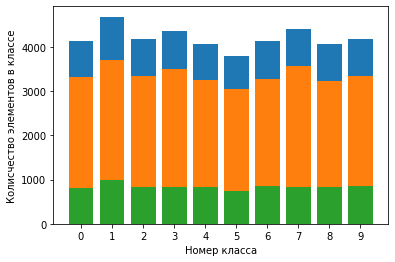

In [5]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

#### FashionMNIST

In [6]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y=mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y  =mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\VScode\ai\fashion-mnist\utils
C:\VScode\ai\fashion-mnist
C:\VScode\ai


Данные для [Обучающая выборка из FashionMNIST]
Количество элементов в датасете: 60000
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255

Данные для [Тестировочная выборка из FashionMNIST]
Количество элементов в датасете: 10000
Количество атрибутов в элементе: 784
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255



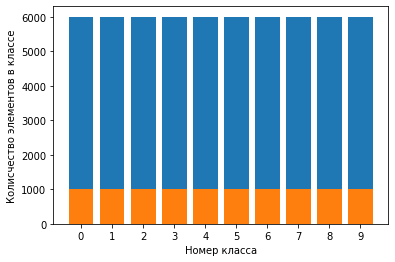

In [7]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из FashionMNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из FashionMNIST")

In [8]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

#### CIFAR-10

In [9]:
def unpickle_cifar(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
test_batch = unpickle_cifar('cifar-10-batches-py/test_batch')
data_batch_1 = unpickle_cifar('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle_cifar('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle_cifar('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle_cifar('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle_cifar('cifar-10-batches-py/data_batch_5')

In [10]:
print(test_batch.keys())
print(data_batch_1.keys())
print(test_batch[b'labels'])
print(test_batch[b'data'])
print(test_batch[b'data'][0])
print(len(test_batch[b'data'][0]))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2,

In [11]:
print("Количество элементов в test_batch  : {}".format(len(test_batch[b'labels'])))
print("Количество элементов в data_batch_1: {}".format(len(data_batch_1[b'labels'])))
print("Количество элементов в data_batch_2: {}".format(len(data_batch_2[b'labels'])))
print("Количество элементов в data_batch_3: {}".format(len(data_batch_3[b'labels'])))
print("Количество элементов в data_batch_4: {}".format(len(data_batch_4[b'labels'])))
print("Количество элементов в data_batch_5: {}".format(len(data_batch_5[b'labels'])))

Количество элементов в test_batch  : 10000
Количество элементов в data_batch_1: 10000
Количество элементов в data_batch_2: 10000
Количество элементов в data_batch_3: 10000
Количество элементов в data_batch_4: 10000
Количество элементов в data_batch_5: 10000


In [12]:
def append_list_to_list(list1, list2):
    for value in list2:
        list1.append(value)

cifar_train_x_raw = []
cifar_train_y = []

append_list_to_list(cifar_train_x_raw, data_batch_1[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_2[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_3[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_4[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_5[b'data'])

append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])

cifar_test_x_raw = test_batch[b'data']
cifar_test_y = test_batch[b'labels']

Данные для [Обчающая выборка CIFAR-10]
Количество элементов в датасете: 50000
Количество атрибутов в элементе: 3072
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255

Данные для [Тестировочная выборка CIFAR-10]
Количество элементов в датасете: 10000
Количество атрибутов в элементе: 3072
Минимальное значение атрибута  : 0
Максимальное значение атрибута : 255



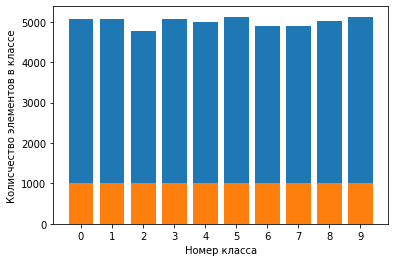

In [13]:
analyze(cifar_train_y, cifar_train_x_raw, "Обчающая выборка CIFAR-10")
analyze(cifar_test_y, cifar_test_x_raw, "Тестировочная выборка CIFAR-10")

Данные для [Тестовая выборка CIFAR-10]
Количество элементов в датасете: 10000
Количество атрибутов в элементе: 1024
Минимальное значение атрибута  : 0.0
Максимальное значение атрибута : 1.0

Размер тестовой выборки : 10000
Размер обучающей выборки: 50000
Размер датасета CIFAR-10: 60000


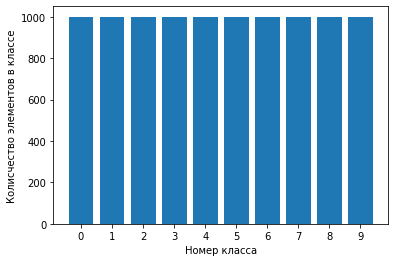

In [14]:
def conv_cifar(X):
    df = np.array(X).astype(np.float32)
    result = np.zeros(len(df) * len(df[0])//3, dtype=np.float32)
    i = 0
    for v in df:
        for j in range(0, len(v), 3):
            result[i] = (v[j] + v[j+1] + v[j+2]) / 765
            i += 1
    return np.reshape(result ,(len(df), len(df[0])//3))

cifar_test_x = conv_cifar(cifar_test_x_raw)
cifar_train_x = conv_cifar(cifar_train_x_raw)
analyze(cifar_test_y,cifar_test_x,"Тестовая выборка CIFAR-10")
print('Размер тестовой выборки : {}'.format(len(cifar_test_x)))
print('Размер обучающей выборки: {}'.format(len(cifar_train_x)))
print('Размер датасета CIFAR-10: {}'.format(len(cifar_test_x) + len(cifar_train_x)))

### Персептрон на PyTorch

In [15]:
class PyTorchPerceptron(torch.nn.Module):
    def __init__(self, layers=[10], func=torch.nn.Sigmoid(), 
                 loss_func=torch.nn.functional.binary_cross_entropy_with_logits, 
                 epochs=10,show_status=False, learning_rate=0.05):
        super().__init__()
        self.layers=layers
        self.func=func
        self.epochs=epochs
        self.show_status=show_status
        self.learning_rate=learning_rate
        self.level=0
        self.loss_function=loss_func
    
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
        
    def fit(self, X, Y):
        self.create_net(X,Y)
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
        
        self.train(X,Y)
        return self
        
    def create_net(self, X,Y):
        self.level=0
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        module_layers = []
        
        if self.show_status:
            self.status_print("Создание сети:")
            self.level += 1
            self.status_print("Количество скрытых слоев    : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов: {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев        : {}".format(self.layers))
            self.level -= 1
        
        for i in range(len(layers_settings)-2):
            module_layers.append(torch.nn.Linear(layers_settings[i], layers_settings[i+1]))
            module_layers.append(self.func)
            
        module_layers.append(torch.nn.Linear(layers_settings[-2], layers_settings[-1]))
        self.net = torch.nn.Sequential(*module_layers)
        return self    

    def train(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        val_y = []
        for y in Y:
            val = np.zeros(self.classes_count)
            for i in range(10):
                val[i] = 1 if i == y else 0
            val_y.append(val.copy().astype(np.float32))
        dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))
        dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)
        optim = torch.optim.Adam(self.net.parameters(),lr=self.learning_rate)
        for epoch in range(1, self.epochs+1):
            for (x,y) in dataloader:
                z = self.net(x)
                loss = self.loss_function(z,y)
                optim.zero_grad()
                loss.backward()
                optim.step()
            acc = self.score(X,Y)
            if self.show_status:
                self.status_print("[Эпоха {} из {}] Потеря: {}, Точность: {}".format(epoch, self.epochs,loss,acc))
                
    def score(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        total_success = 0
        for res, y in zip(results, Y):
            if res == y:
                total_success += 1
        acc = total_success / len(Y)
        return acc
    def confusion_matrix(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
        for res, y in zip(results, Y):
            matrix[res][y] += 1
        return matrix
        

### Тестирование MNIST

#### Однослойные персептроны

Функция активации: Sigmoid   
Количество внутренних слоев: 0

In [16]:
first_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[])
first_one_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(first_one_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:


C:\Users\valek\AppData\Local\Temp\ipykernel_11832\3528414727.py:63: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:210.)
  dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))


  [Эпоха 1 из 10] Потеря: 0.011023901402950287, Точность: 0.8992261904761905
  [Эпоха 2 из 10] Потеря: 0.015569555573165417, Точность: 0.9096428571428572
  [Эпоха 3 из 10] Потеря: 0.0067485636100173, Точность: 0.9051190476190476
  [Эпоха 4 из 10] Потеря: 0.016719844192266464, Точность: 0.9121130952380953
  [Эпоха 5 из 10] Потеря: 0.009601885452866554, Точность: 0.9082142857142858
  [Эпоха 6 из 10] Потеря: 0.010809415951371193, Точность: 0.9094642857142857
  [Эпоха 7 из 10] Потеря: 0.007794512901455164, Точность: 0.9099107142857142
  [Эпоха 8 из 10] Потеря: 0.004436713643372059, Точность: 0.9096726190476191
  [Эпоха 9 из 10] Потеря: 0.004135460592806339, Точность: 0.9069940476190477
  [Эпоха 10 из 10] Потеря: 0.003445155918598175, Точность: 0.9091666666666667
Точность сети: 0.8863095238095238


Функция активации: ReLU   
Количество внутренних слоев: 0

In [17]:
second_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.ReLU())
second_one_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(second_one_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.011309823021292686, Точность: 0.815297619047619
  [Эпоха 2 из 10] Потеря: 0.0199689120054245, Точность: 0.8311011904761905
  [Эпоха 3 из 10] Потеря: 0.0062018511816859245, Точность: 0.8226190476190476
  [Эпоха 4 из 10] Потеря: 0.01210017316043377, Точность: 0.8322321428571429
  [Эпоха 5 из 10] Потеря: 0.015089182183146477, Точность: 0.8386011904761905
  [Эпоха 6 из 10] Потеря: 0.004098241217434406, Точность: 0.83125
  [Эпоха 7 из 10] Потеря: 0.003987347241491079, Точность: 0.8326785714285714
  [Эпоха 8 из 10] Потеря: 0.0030462881550192833, Точность: 0.8357142857142857
  [Эпоха 9 из 10] Потеря: 0.02335618995130062, Точность: 0.8425297619047619
  [Эпоха 10 из 10] Потеря: 0.003925786819308996, Точность: 0.8342559523809524
Точность сети: 0.809047619047619


Функция активации: Tanh   
Количество внутренних слоев: 0

In [18]:
third_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh())
third_one_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(third_one_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.011155446991324425, Точность: 0.8951785714285714
  [Эпоха 2 из 10] Потеря: 0.01621602289378643, Точность: 0.9058333333333334
  [Эпоха 3 из 10] Потеря: 0.00833788514137268, Точность: 0.9045238095238095
  [Эпоха 4 из 10] Потеря: 0.002926421817392111, Точность: 0.9047916666666667
  [Эпоха 5 из 10] Потеря: 0.02411673031747341, Точность: 0.9050595238095238
  [Эпоха 6 из 10] Потеря: 0.011266926303505898, Точность: 0.9039583333333333
  [Эпоха 7 из 10] Потеря: 0.0118714589625597, Точность: 0.9051488095238095
  [Эпоха 8 из 10] Потеря: 0.004861799068748951, Точность: 0.9046428571428572
  [Эпоха 9 из 10] Потеря: 0.004770164843648672, Точность: 0.905
  [Эпоха 10 из 10] Потеря: 0.00898736622184515, Точность: 0.905952380952381
Точность сети: 0.8832142857142857


#### Двуслойные персептроны

Функция активации: Tanh   
Количество внутренних слоев: 1   
Широты: 15

In [19]:
first_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[15], func=torch.nn.Tanh())
first_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(first_two_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [15]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.07377892732620239, Точность: 0.6964285714285714
  [Эпоха 2 из 10] Потеря: 0.049897368997335434, Точность: 0.7434226190476191
  [Эпоха 3 из 10] Потеря: 0.04876232147216797, Точность: 0.7366369047619048
  [Эпоха 4 из 10] Потеря: 0.05174570530653, Точность: 0.756547619047619
  [Эпоха 5 из 10] Потеря: 0.075261190533638, Точность: 0.7425297619047619
  [Эпоха 6 из 10] Потеря: 0.06285393238067627, Точность: 0.7702083333333334
  [Эпоха 7 из 10] Потеря: 0.043567538261413574, Точность: 0.7863095238095238
  [Эпоха 8 из 10] Потеря: 0.07311052829027176, Точность: 0.8047916666666667
  [Эпоха 9 из 10] Потеря: 0.061962902545928955, Точность: 0.7876488095238096
  [Эпоха 10 из 10] Потеря: 0.07975789159536362, Точность: 0.8012797619047619
Точность сети: 0.8005952380952381


Функция активации: Tanh   
Количество внутренних слоев: 1   
Широты: 30

In [20]:
second_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[30], func=torch.nn.Tanh())
second_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(second_two_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [30]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.04145370423793793, Точность: 0.8005357142857142
  [Эпоха 2 из 10] Потеря: 0.012059565633535385, Точность: 0.841220238095238
  [Эпоха 3 из 10] Потеря: 0.05652482435107231, Точность: 0.8073214285714285
  [Эпоха 4 из 10] Потеря: 0.020147789269685745, Точность: 0.8063095238095238
  [Эпоха 5 из 10] Потеря: 0.048607904464006424, Точность: 0.8458630952380952
  [Эпоха 6 из 10] Потеря: 0.023479733616113663, Точность: 0.8432142857142857
  [Эпоха 7 из 10] Потеря: 0.031438954174518585, Точность: 0.8446428571428571
  [Эпоха 8 из 10] Потеря: 0.09257340431213379, Точность: 0.8338988095238096
  [Эпоха 9 из 10] Потеря: 0.02371090278029442, Точность: 0.850297619047619
  [Эпоха 10 из 10] Потеря: 0.044329024851322174, Точность: 0.8340773809523809
Точность сети: 0.8335714285714285


Функция активации: Sigmoid   
Количество внутренних слоев: 1   
Широты: 30

In [21]:
third_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[30])
third_two_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(third_two_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [30]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.022934747859835625, Точность: 0.8583630952380953
  [Эпоха 2 из 10] Потеря: 0.05964256450533867, Точность: 0.8758630952380952
  [Эпоха 3 из 10] Потеря: 0.014037460088729858, Точность: 0.8830357142857143
  [Эпоха 4 из 10] Потеря: 0.011822382919490337, Точность: 0.8892559523809523
  [Эпоха 5 из 10] Потеря: 0.02809997834265232, Точность: 0.8825892857142857
  [Эпоха 6 из 10] Потеря: 0.01931687630712986, Точность: 0.8873214285714286
  [Эпоха 7 из 10] Потеря: 0.02974674105644226, Точность: 0.895922619047619
  [Эпоха 8 из 10] Потеря: 0.01972005143761635, Точность: 0.9073214285714286
  [Эпоха 9 из 10] Потеря: 0.021126845851540565, Точность: 0.9055654761904762
  [Эпоха 10 из 10] Потеря: 0.022331561893224716, Точность: 0.9050297619047619
Точность сети: 0.8939285714285714


#### Трехслойные персептроны

Функция активации: Tanh   
Количество внутренних слоев: 2   
Широты: 30, 20

In [22]:
first_three_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[30, 20])
first_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(first_three_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [30, 20]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.11043871939182281, Точность: 0.674672619047619
  [Эпоха 2 из 10] Потеря: 0.09339135140180588, Точность: 0.7744940476190476
  [Эпоха 3 из 10] Потеря: 0.07946902513504028, Точность: 0.8060416666666667
  [Эпоха 4 из 10] Потеря: 0.04118945077061653, Точность: 0.8044642857142857
  [Эпоха 5 из 10] Потеря: 0.05935279279947281, Точность: 0.85625
  [Эпоха 6 из 10] Потеря: 0.02498829923570156, Точность: 0.856875
  [Эпоха 7 из 10] Потеря: 0.033363766968250275, Точность: 0.8532142857142857
  [Эпоха 8 из 10] Потеря: 0.01150412019342184, Точность: 0.8795833333333334
  [Эпоха 9 из 10] Потеря: 0.014498335309326649, Точность: 0.8612202380952381
  [Эпоха 10 из 10] Потеря: 0.04999162629246712, Точность: 0.8793154761904762
Точность сети: 0.8689285714285714


Функция активации: Sigmoid   
Количество внутренних слоев: 2   
Широты: 20, 15

In [23]:
second_three_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15])
second_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(second_three_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.27661070227622986, Точность: 0.20086309523809523
  [Эпоха 2 из 10] Потеря: 0.27658945322036743, Точность: 0.20392857142857143
  [Эпоха 3 из 10] Потеря: 0.2775683104991913, Точность: 0.2057142857142857
  [Эпоха 4 из 10] Потеря: 0.27650317549705505, Точность: 0.20318452380952381
  [Эпоха 5 из 10] Потеря: 0.328460693359375, Точность: 0.19657738095238095
  [Эпоха 6 из 10] Потеря: 0.30579131841659546, Точность: 0.1974702380952381
  [Эпоха 7 из 10] Потеря: 0.21743139624595642, Точность: 0.38035714285714284
  [Эпоха 8 из 10] Потеря: 0.20374539494514465, Точность: 0.42136904761904764
  [Эпоха 9 из 10] Потеря: 0.1053701788187027, Точность: 0.7035416666666666
  [Эпоха 10 из 10] Потеря: 0.05899498984217644, Точность: 0.7745238095238095
Точность сети: 0.7713095238095238


Функция активации: ELU   
Количество внутренних слоев: 2   
Широты: 20, 15

In [24]:
third_three_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.ELU())
third_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(third_three_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.03761623799800873, Точность: 0.8263988095238095
  [Эпоха 2 из 10] Потеря: 0.04789305850863457, Точность: 0.7758035714285715
  [Эпоха 3 из 10] Потеря: 0.05467111989855766, Точность: 0.7703571428571429
  [Эпоха 4 из 10] Потеря: 0.0689489096403122, Точность: 0.6097023809523809
  [Эпоха 5 из 10] Потеря: 0.06285648047924042, Точность: 0.6199702380952381
  [Эпоха 6 из 10] Потеря: 0.10822433233261108, Точность: 0.553422619047619
  [Эпоха 7 из 10] Потеря: 0.17800770699977875, Точность: 0.45086309523809526
  [Эпоха 8 из 10] Потеря: 0.17507481575012207, Точность: 0.45014880952380953
  [Эпоха 9 из 10] Потеря: 0.17832373082637787, Точность: 0.44458333333333333
  [Эпоха 10 из 10] Потеря: 0.1763780117034912, Точность: 0.46574404761904764
Точность сети: 0.45916666666666667


Функция активации: Softsign   
Количество внутренних слоев: 2   
Широты: 20, 15

In [25]:
fourth_three_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.Softsign())
fourth_three_layer_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети: {}".format(fourth_three_layer_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.016162855550646782, Точность: 0.8053571428571429
  [Эпоха 2 из 10] Потеря: 0.028606999665498734, Точность: 0.8328869047619047
  [Эпоха 3 из 10] Потеря: 0.03910716623067856, Точность: 0.849672619047619
  [Эпоха 4 из 10] Потеря: 0.016847144812345505, Точность: 0.8319047619047619
  [Эпоха 5 из 10] Потеря: 0.04107269272208214, Точность: 0.8251785714285714
  [Эпоха 6 из 10] Потеря: 0.021694930270314217, Точность: 0.8870833333333333
  [Эпоха 7 из 10] Потеря: 0.016231324523687363, Точность: 0.885625
  [Эпоха 8 из 10] Потеря: 0.028083886951208115, Точность: 0.8838690476190476
  [Эпоха 9 из 10] Потеря: 0.023246876895427704, Точность: 0.8652380952380953
  [Эпоха 10 из 10] Потеря: 0.007785698864609003, Точность: 0.891547619047619
Точность сети: 0.8866666666666667


### Тестирование FashionMNIST

#### Однослойные персептроны

Функция активации: Softsign   
Количество внутренних слоев: 0

In [26]:
first_fmnist_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Softsign(), learning_rate = 0.001, epochs=25)
first_fmnist_one_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети: {}".format(first_fmnist_one_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 25] Потеря: 0.09121482074260712, Точность: 0.8301166666666666
  [Эпоха 2 из 25] Потеря: 0.08325105160474777, Точность: 0.8417833333333333
  [Эпоха 3 из 25] Потеря: 0.07932130992412567, Точность: 0.8475333333333334
  [Эпоха 4 из 25] Потеря: 0.07690975815057755, Точность: 0.8504
  [Эпоха 5 из 25] Потеря: 0.07525879889726639, Точность: 0.8522666666666666
  [Эпоха 6 из 25] Потеря: 0.07403717190027237, Точность: 0.8538166666666667
  [Эпоха 7 из 25] Потеря: 0.07308219373226166, Точность: 0.8553166666666666
  [Эпоха 8 из 25] Потеря: 0.07230633497238159, Точность: 0.8567166666666667
  [Эпоха 9 из 25] Потеря: 0.07165847718715668, Точность: 0.8575666666666667
  [Эпоха 10 из 25] Потеря: 0.0711064413189888, Точность: 0.8582833333333333
  [Эпоха 11 из 25] Потеря: 0.07062874734401703, Точность: 0.85885
  [Эпоха 12 из 2

Функция активации: Sigmoid   
Количество внутренних слоев: 0

In [27]:
second_fmnist_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate = 0.001, epochs=20)
second_fmnist_one_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети: {}".format(second_fmnist_one_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 20] Потеря: 0.09073998034000397, Точность: 0.8300666666666666
  [Эпоха 2 из 20] Потеря: 0.08293265849351883, Точность: 0.84265
  [Эпоха 3 из 20] Потеря: 0.07909707725048065, Точность: 0.8477833333333333
  [Эпоха 4 из 20] Потеря: 0.07674829661846161, Точность: 0.8506333333333334
  [Эпоха 5 из 20] Потеря: 0.07513940334320068, Точность: 0.85255
  [Эпоха 6 из 20] Потеря: 0.07394678890705109, Точность: 0.8537333333333333
  [Эпоха 7 из 20] Потеря: 0.07301271706819534, Точность: 0.8555333333333334
  [Эпоха 8 из 20] Потеря: 0.07225239276885986, Точность: 0.8568333333333333
  [Эпоха 9 из 20] Потеря: 0.07161648571491241, Точность: 0.8575166666666667
  [Эпоха 10 из 20] Потеря: 0.07107396423816681, Точность: 0.8586
  [Эпоха 11 из 20] Потеря: 0.07060395181179047, Точность: 0.8591666666666666
  [Эпоха 12 из 20] Потеря:

Функция активации: Tanh   
Количество внутренних слоев: 0

In [28]:
third_fmnist_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh(), learning_rate=0.001)
third_fmnist_one_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети: {}".format(third_fmnist_one_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 10] Потеря: 0.09189483523368835, Точность: 0.8299833333333333
  [Эпоха 2 из 10] Потеря: 0.08382229506969452, Точность: 0.8421833333333333
  [Эпоха 3 из 10] Потеря: 0.07983866333961487, Точность: 0.8474
  [Эпоха 4 из 10] Потеря: 0.07737738639116287, Точность: 0.8506666666666667
  [Эпоха 5 из 10] Потеря: 0.0756760984659195, Точность: 0.8524
  [Эпоха 6 из 10] Потеря: 0.07440652698278427, Точность: 0.8538
  [Эпоха 7 из 10] Потеря: 0.07340805232524872, Точность: 0.8553666666666667
  [Эпоха 8 из 10] Потеря: 0.07259394973516464, Точность: 0.8565166666666667
  [Эпоха 9 из 10] Потеря: 0.07191307097673416, Точность: 0.8573166666666666
  [Эпоха 10 из 10] Потеря: 0.07133274525403976, Точность: 0.8582333333333333
Точность сети: 0.8372


#### Двуслойные персептроны

Функция активации: Sigmoid   
Количество внутренних слоев: 1   
Широты: 30

In [29]:
first_fmnist_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[30], epochs=20, learning_rate=0.001)
first_fmnist_two_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети: {}".format(first_fmnist_two_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [30]
Обучение сети:
  [Эпоха 1 из 20] Потеря: 0.07776828110218048, Точность: 0.8340833333333333
  [Эпоха 2 из 20] Потеря: 0.06454398483037949, Точность: 0.8536166666666667
  [Эпоха 3 из 20] Потеря: 0.0565086230635643, Точность: 0.8643333333333333
  [Эпоха 4 из 20] Потеря: 0.05381439998745918, Точность: 0.8709166666666667
  [Эпоха 5 из 20] Потеря: 0.05006830766797066, Точность: 0.8757166666666667
  [Эпоха 6 из 20] Потеря: 0.04492797330021858, Точность: 0.8795833333333334
  [Эпоха 7 из 20] Потеря: 0.041002482175827026, Точность: 0.8827833333333334
  [Эпоха 8 из 20] Потеря: 0.03851425647735596, Точность: 0.8851166666666667
  [Эпоха 9 из 20] Потеря: 0.03621907904744148, Точность: 0.8874666666666666
  [Эпоха 10 из 20] Потеря: 0.03367352858185768, Точность: 0.8899166666666667
  [Эпоха 11 из 20] Потеря: 0.031457629054784775, Точность: 0.891533

Функция активации: Sigmoid   
Количество внутренних слоев: 1   
Широты: 50

In [30]:
second_fmnist_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[50], learning_rate=0.001, epochs=20)
second_fmnist_two_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети: {}".format(second_fmnist_two_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [50]
Обучение сети:
  [Эпоха 1 из 20] Потеря: 0.0711955577135086, Точность: 0.8414666666666667
  [Эпоха 2 из 20] Потеря: 0.058380793780088425, Точность: 0.8627166666666667
  [Эпоха 3 из 20] Потеря: 0.04995030537247658, Точность: 0.8722833333333333
  [Эпоха 4 из 20] Потеря: 0.044069040566682816, Точность: 0.87775
  [Эпоха 5 из 20] Потеря: 0.04072874039411545, Точность: 0.8821
  [Эпоха 6 из 20] Потеря: 0.03780045360326767, Точность: 0.8859333333333334
  [Эпоха 7 из 20] Потеря: 0.03426392003893852, Точность: 0.8893333333333333
  [Эпоха 8 из 20] Потеря: 0.031135637313127518, Точность: 0.89215
  [Эпоха 9 из 20] Потеря: 0.02913697436451912, Точность: 0.8948166666666667
  [Эпоха 10 из 20] Потеря: 0.02774854004383087, Точность: 0.89755
  [Эпоха 11 из 20] Потеря: 0.026752308011054993, Точность: 0.8995
  [Эпоха 12 из 20] Потеря: 0.026257902383804

Функция активации: ReLU   
Количество внутренних слоев: 1   
Широты: 100

In [31]:
third_fmnist_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[100], learning_rate=0.001, epochs=20, func=torch.nn.ReLU())
third_fmnist_two_layer_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети: {}".format(third_fmnist_two_layer_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 784
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [100]
Обучение сети:
  [Эпоха 1 из 20] Потеря: 0.07361547648906708, Точность: 0.8225666666666667
  [Эпоха 2 из 20] Потеря: 0.06682971864938736, Точность: 0.8419333333333333
  [Эпоха 3 из 20] Потеря: 0.05941590666770935, Точность: 0.8550666666666666
  [Эпоха 4 из 20] Потеря: 0.048052411526441574, Точность: 0.8630833333333333
  [Эпоха 5 из 20] Потеря: 0.04311700910329819, Точность: 0.8668833333333333
  [Эпоха 6 из 20] Потеря: 0.035977549850940704, Точность: 0.8704833333333334
  [Эпоха 7 из 20] Потеря: 0.03560571372509003, Точность: 0.8757333333333334
  [Эпоха 8 из 20] Потеря: 0.03139938414096832, Точность: 0.8765333333333334
  [Эпоха 9 из 20] Потеря: 0.029586512595415115, Точность: 0.8787166666666667
  [Эпоха 10 из 20] Потеря: 0.02786329761147499, Точность: 0.8822166666666666
  [Эпоха 11 из 20] Потеря: 0.026816794648766518, Точность: 0.88

### Тестирование CIFAR-10

#### Однослойные персептроны

Функция активации: Tanh   
Количество внутренних слоев: 0

In [32]:
cifar_one_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
cifar_one_layer_perceptron.fit(cifar_train_x, cifar_train_y)
print("Точность сети: {}".format(cifar_one_layer_perceptron.score(cifar_test_x, cifar_test_y)))

Создание сети:
  Количество скрытых слоев    : 0
  Количество входных нейронов : 1024
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : []
Обучение сети:
  [Эпоха 1 из 50] Потеря: 0.3248946964740753, Точность: 0.12816
  [Эпоха 2 из 50] Потеря: 0.32510000467300415, Точность: 0.13462
  [Эпоха 3 из 50] Потеря: 0.32525381445884705, Точность: 0.13736
  [Эпоха 4 из 50] Потеря: 0.3252771496772766, Точность: 0.13968
  [Эпоха 5 из 50] Потеря: 0.3252254128456116, Точность: 0.14182
  [Эпоха 6 из 50] Потеря: 0.32513466477394104, Точность: 0.14242
  [Эпоха 7 из 50] Потеря: 0.32502275705337524, Точность: 0.14338
  [Эпоха 8 из 50] Потеря: 0.3248986601829529, Точность: 0.14442
  [Эпоха 9 из 50] Потеря: 0.3247670531272888, Точность: 0.14566
  [Эпоха 10 из 50] Потеря: 0.3246307969093323, Точность: 0.14652
  [Эпоха 11 из 50] Потеря: 0.3244916796684265, Точность: 0.14732
  [Эпоха 12 из 50] Потеря: 0.3243510127067566, Точность: 0.1476
  [Эпоха 13 из 50] Потеря: 0.3242098391056061, Точность

#### Двуслойные персептроны

Функция активации: Sigmoid   
Количество внутренних слоев: 1   
Широты: 100

In [33]:
cifar_two_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[100], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
cifar_two_layer_perceptron.fit(cifar_train_x, cifar_train_y)
print("Точность сети: {}".format(cifar_two_layer_perceptron.score(cifar_test_x, cifar_test_y)))

Создание сети:
  Количество скрытых слоев    : 1
  Количество входных нейронов : 1024
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [100]
Обучение сети:
  [Эпоха 1 из 50] Потеря: 0.320545494556427, Точность: 0.1253
  [Эпоха 2 из 50] Потеря: 0.31851744651794434, Точность: 0.13396
  [Эпоха 3 из 50] Потеря: 0.3149591088294983, Точность: 0.1383
  [Эпоха 4 из 50] Потеря: 0.3166646957397461, Точность: 0.14152
  [Эпоха 5 из 50] Потеря: 0.31748509407043457, Точность: 0.14456
  [Эпоха 6 из 50] Потеря: 0.31709492206573486, Точность: 0.14634
  [Эпоха 7 из 50] Потеря: 0.31696221232414246, Точность: 0.14832
  [Эпоха 8 из 50] Потеря: 0.3167455196380615, Точность: 0.1491
  [Эпоха 9 из 50] Потеря: 0.31652384996414185, Точность: 0.15008
  [Эпоха 10 из 50] Потеря: 0.3153230547904968, Точность: 0.15122
  [Эпоха 11 из 50] Потеря: 0.3147997260093689, Точность: 0.15272
  [Эпоха 12 из 50] Потеря: 0.3158738911151886, Точность: 0.1538
  [Эпоха 13 из 50] Потеря: 0.31477242708206177, Точност

#### Трехслойные персептроны

Функция активации: Sigmoid   
Количество внутренних слоев: 1   
Широты: 324, 100

In [34]:
cifar_three_layer_perceptron = PyTorchPerceptron(show_status=True, layers=[324, 100], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
cifar_three_layer_perceptron.fit(cifar_train_x, cifar_train_y)
print("Точность сети: {}".format(cifar_three_layer_perceptron.score(cifar_test_x, cifar_test_y)))

Создание сети:
  Количество скрытых слоев    : 2
  Количество входных нейронов : 1024
  Koличество выходных нейронов: 10
  Широты скрытых слоев        : [324, 100]
Обучение сети:
  [Эпоха 1 из 50] Потеря: 0.31959185004234314, Точность: 0.12978
  [Эпоха 2 из 50] Потеря: 0.3168083727359772, Точность: 0.13906
  [Эпоха 3 из 50] Потеря: 0.31778085231781006, Точность: 0.14414
  [Эпоха 4 из 50] Потеря: 0.31839314103126526, Точность: 0.14888
  [Эпоха 5 из 50] Потеря: 0.31698697805404663, Точность: 0.15208
  [Эпоха 6 из 50] Потеря: 0.3144499957561493, Точность: 0.15472
  [Эпоха 7 из 50] Потеря: 0.3125808537006378, Точность: 0.15646
  [Эпоха 8 из 50] Потеря: 0.3118501901626587, Точность: 0.15762
  [Эпоха 9 из 50] Потеря: 0.31026798486709595, Точность: 0.16008
  [Эпоха 10 из 50] Потеря: 0.30909934639930725, Точность: 0.16142
  [Эпоха 11 из 50] Потеря: 0.30897778272628784, Точность: 0.16206
  [Эпоха 12 из 50] Потеря: 0.30910220742225647, Точность: 0.16316
  [Эпоха 13 из 50] Потеря: 0.3079035282135

#### Итоги тестирования

Итоговая таблицу тестрования нейросетей различной конфигурации для различных датасетов.  
Лучшие нейросети выделены жирным шрифтом для лучшей визуализации о достижения положительного результата обучения и тестирования.

| № | Количество слоев | Широты | Функция активации | Скорость обучения | Количество эпох | Тестовая точность (%) | Датасет |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **1**| **1**| **784**| **Sigmoid**| **0.05**| **10**| **88.63095238095238**| **MNIST**|
| 2| 1| 784| ReLU| 0.05| 10| 80.9047619047619| MNIST |
|3| 1| 784| Tanh| 0.05| 10| 88.32142857142857| MNIST |
| 4| 2| 784-15| Tanh| 0.05| 10| 80.05952380952381| MNIST |
| 5| 2| 784-30| Tanh| 0.05| 10| 83.35714285714285| MNIST |
| **6**| **2**| **784-30**| **Sigmoid**| **0.05**| **10**| **89.39285714285714**| **MNIST** |
| 7| 3| 784-30-20| Tanh| 0.05| 10| 86.89285714285714| MNIST |
| 8| 3| 784-20-15| Sigmoid| 0.05| 10| 77.13095238095238| MNIST |
| 9| 3| 784-20-15| ELU| 0.05| 10| 45.916666666666667| MNIST |
| **10**| **3**| **784-20-15**| **Softsign**| **0.05**| **10**| **88.66666666666667**| **MNIST** |
| 11| 1| 784 | Softsign| 0.001| 25| 83.9| FashionMNIST |
| **12**| **1**| **784** | **Sigmoid** | **0.001**| **20**| **83.93**| **FashionMNIST** |
| 13| 1| 784 | Tanh | 0.001| 10| 83.72| FashionMNIST |
| 14| 2| 784-30 | Sigmoid | 0.001| 20| 86.8| FashionMNIST |
| **15**| **2**| **784-50** | **Sigmoid** | **0.001**| **20**| **87.46**| **FashionMNIST** |
| 16| 2| 784-100 | ReLU | 0.001| 20| 85.83| FashionMNIST |
| 17| 1| 1024 | Sigmoid | 0.0001| 50| 30.41| CIFAR-10|
| 18| 3| 1024-100| Sigmoid | 0.0001| 50| 40.19| CIFAR-10|
| 19| 3| 1024-324-100| Sigmoid | 0.0001| 50| 44.66| CIFAR-10|

Получим ConfusionMatrix для наиболее удачных нейронных сетей:

In [36]:
print('Confusion matrix MNIST:')
print(third_two_layer_perceptron.confusion_matrix(fashion_mnist_test_x, fashion_mnist_test_y))

Confusion matrix MNIST:
[[  6   3  26   3  25 133  17   3   6   1]
 [  0   0   0   0   0   1   0   0   0   0]
 [851 745 892 651 905 694 859 945 595 935]
 [  9  26   2  47   0  38   6   3  76  25]
 [  2   0   1   1   2  52   1  39   6   0]
 [ 24   0   4   8   0  42   7   1  32  26]
 [ 86 215  68 257  63  21  92   1 199   6]
 [  9   2   3  13   4   9   8   0  13   6]
 [ 10   9   4  20   1   9   8   8  70   1]
 [  3   0   0   0   0   1   2   0   3   0]]


In [37]:
print('Confusion matrix FashionMNIST:')
print(second_fmnist_two_layer_perceptron.confusion_matrix(fashion_mnist_test_x, fashion_mnist_test_y))

Confusion matrix FashionMNIST:
[[858   6  15  27   1   1 172   0   3   0]
 [  3 958   1   4   0   0   2   0   1   0]
 [ 24   4 795  16  87   0 102   0   6   0]
 [ 38  25  13 888  30   1  41   0   6   0]
 [  4   5 117  43 837   0  82   0   5   0]
 [  0   0   0   1   1 944   0  16   2   8]
 [ 58   0  56  16  39   0 583   0   3   1]
 [  0   0   0   0   0  31   0 966   6  42]
 [ 14   2   3   5   5   2  18   0 968   0]
 [  1   0   0   0   0  21   0  18   0 949]]


В ходе лабораторной работы удалось реализовать несколько простых нейросетей с использованием фреймворка для создания нейросетей - PyTorch. Нейросети были обучены и протестированы на разных датасетаx: MNIST, FashionMNIST и CIFAR-10.
Результаты тестирования на датасетах MNIST и FashionMNIST довольно хорошие (>80%). К сожалению на датасете CIFAR-10 результаты довольно низкие, это связано с тем, что для классификации данного датасета нужно использовать сверточные слои.

После выполнения лабораторной работы, стало понятно, что PyTorch уже содержит базовые наборы данных и конструкции для нейросетей, поэтому с помощью него можно быстро реализовать персептрон. Базовые датасеты можно быстро и легко научить распознавать с довольно высокой точностью.